# Appendix

## Reading Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [3]:
df_main = pd.read_excel('Cleaned Data_Updated2.xlsx')
df_main['Month']=pd.to_datetime(df_main['Month'])

In [4]:
df_main.head()

,Month,Flash Tank,Tissue Hold,Wall tap,Wall Shower,Towel hanger,Soap Case,Commode Cover,Plastic Pan,Trading Ceramic,Other Accessoires,Metaplast,Magic PIPE,Water Heater -Shine,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2018-07-01,6354.98,4598.98,14068.60,4297.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.3
1,2018-08-01,10450.31,8795.31,12668.41,6425.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-01,9499.27,7897.27,14068.60,8073.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-01,12668.41,9733.41,15450.31,6789.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-01,9726.94,8067.94,14068.60,6933.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_main.describe()

,Flash Tank,Tissue Hold,Wall tap,Wall Shower,Towel hanger,Soap Case,Commode Cover,Plastic Pan,Trading Ceramic,Other Accessoires,Metaplast,Magic PIPE,Water Heater -Shine,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,41.000000,41.000000,41.000000,41.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.0,1.0,1.0
mean,26443.675999,10294.488617,31711.552197,11920.188210,7017.718967,6696.031383,1517.173600,6244.586384,3965.965183,2069.671992,1537.891033,4261.516600,6651.631433,NaN,3.0,2.3
std,12747.455961,3181.389196,13316.697355,4607.696221,1560.569324,2214.239999,724.991759,2334.648403,3455.091295,686.327699,1049.458375,1586.220883,10708.256177,NaN,NaN,NaN
min,6354.980000,3854.250000,10450.310000,4297.820000,3663.780000,3044.964000,501.585000,2763.432000,18.750000,1029.274500,491.040000,1669.425000,-942.000000,NaN,3.0,2.3
25%,15264.270000,8067.940000,24341.358000,8901.825000,6093.979000,5139.320500,1033.895000,5075.906000,1190.137500,1616.137250,803.695000,3232.607500,312.537500,NaN,3.0,2.3
50%,24126.120000,9246.392000,27597.814000,10077.240000,6831.968000,5817.679500,1295.022500,5878.002500,3181.327000,1798.457500,1350.163000,3834.717500,1213.285000,NaN,3.0,2.3
75%,36960.100000,12633.763500,41459.254000,15412.190000,8036.040000,8133.522500,1920.625000,6659.224750,6084.224500,2437.406250,1698.125000,4753.016250,10118.100000,NaN,3.0,2.3
max,52136.678000,16943.958000,61110.054000,21146.527000,10311.820000,12115.692000,3819.121000,14239.960000,12366.400000,3890.443000,4980.300000,9206.838000,44591.400000,NaN,3.0,2.3


In [6]:
df_main=df_main.dropna(axis=1)

In [7]:
df_main.head()

,Month,Flash Tank,Tissue Hold,Wall tap,Wall Shower
0,2018-07-01,6354.98,4598.98,14068.60,4297.820
1,2018-08-01,10450.31,8795.31,12668.41,6425.980
2,2018-09-01,9499.27,7897.27,14068.60,8073.140
3,2018-10-01,12668.41,9733.41,15450.31,6789.888
4,2018-11-01,9726.94,8067.94,14068.60,6933.700


In [8]:
df_main.rename(columns={"Flash Tank": "Flash_Tank",
                        'Month':'Months',
                        "Tissue Hold": "Tissue_Hold",
                        'Wall tap':'Wall_Tap',
                        'Wall Shower':'Wall_Shower'},inplace=True)

In [9]:
df_main.head()

,Months,Flash_Tank,Tissue_Hold,Wall_Tap,Wall_Shower
0,2018-07-01,6354.98,4598.98,14068.60,4297.820
1,2018-08-01,10450.31,8795.31,12668.41,6425.980
2,2018-09-01,9499.27,7897.27,14068.60,8073.140
3,2018-10-01,12668.41,9733.41,15450.31,6789.888
4,2018-11-01,9726.94,8067.94,14068.60,6933.700


In [10]:
df_main.set_index('Months', inplace=True)

In [11]:
df_main.head()

,Flash_Tank,Tissue_Hold,Wall_Tap,Wall_Shower
Months,,,,
2018-07-01,6354.98,4598.98,14068.60,4297.820
2018-08-01,10450.31,8795.31,12668.41,6425.980
2018-09-01,9499.27,7897.27,14068.60,8073.140
2018-10-01,12668.41,9733.41,15450.31,6789.888
2018-11-01,9726.94,8067.94,14068.60,6933.700


Text(0, 0.5, 'Production')

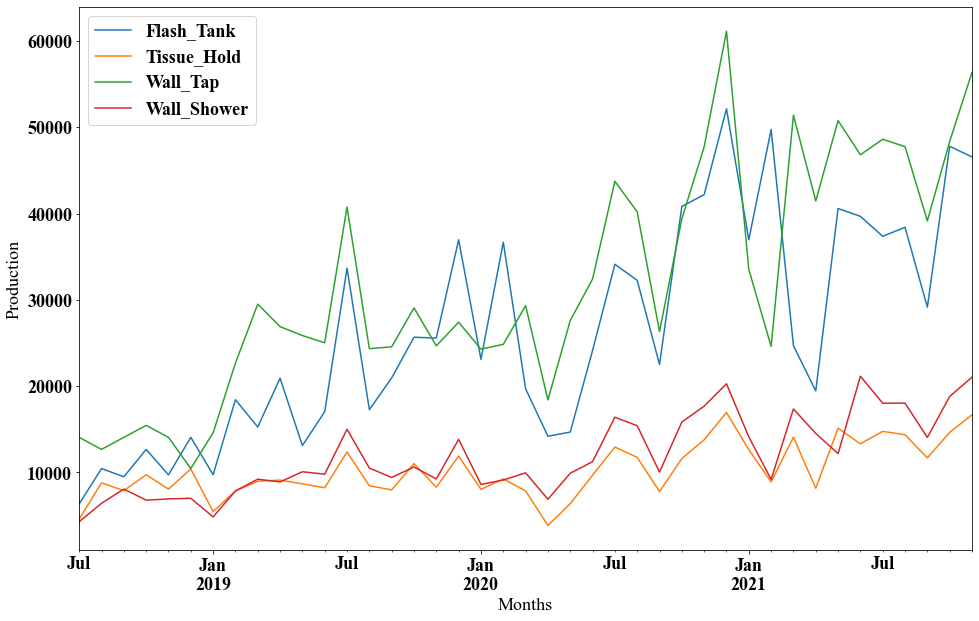

In [12]:
df_main.plot(figsize = (16,10))
plt.ylabel('Production')

###  Taking one product 

Text(0, 0.5, 'Production')

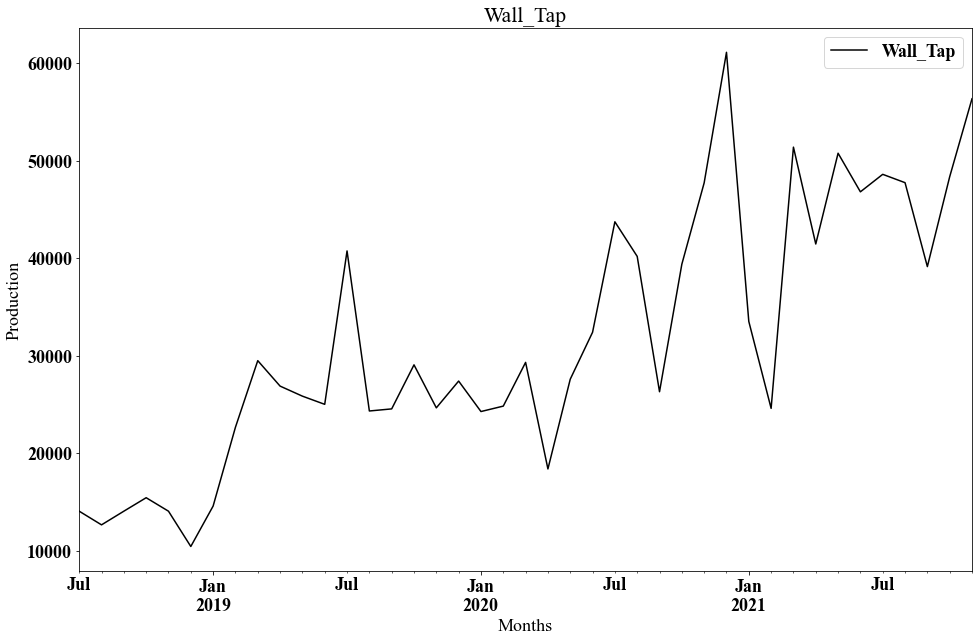

In [13]:
prod_name='Wall_Tap'
df=df_main[prod_name]
df.plot(figsize = (16,10), title=prod_name, legend=True, color='black')
plt.ylabel('Production')

In [14]:
des=df.describe()
des

count       41.000000
mean     31711.552197
std      13316.697355
min      10450.310000
25%      24341.358000
50%      27597.814000
75%      41459.254000
max      61110.054000
Name: Wall_Tap, dtype: float64

In [15]:
des.to_excel('data_description.xlsx')

## Splitting data for Test and Train

In [16]:
test_value=4 ##10% of the data set

In [17]:
df_train=df[:-test_value]
df_train.tail()

Months
2021-03-01    51388.681
2021-04-01    41459.254
2021-05-01    50765.714
2021-06-01    46807.288
2021-07-01    48601.560
Name: Wall_Tap, dtype: float64

In [18]:
df_test=df[-test_value:]
df_test

Months
2021-08-01    47746.202667
2021-09-01    39141.667565
2021-10-01    48351.484333
2021-11-01    56349.109000
Name: Wall_Tap, dtype: float64






## Decomposing Data

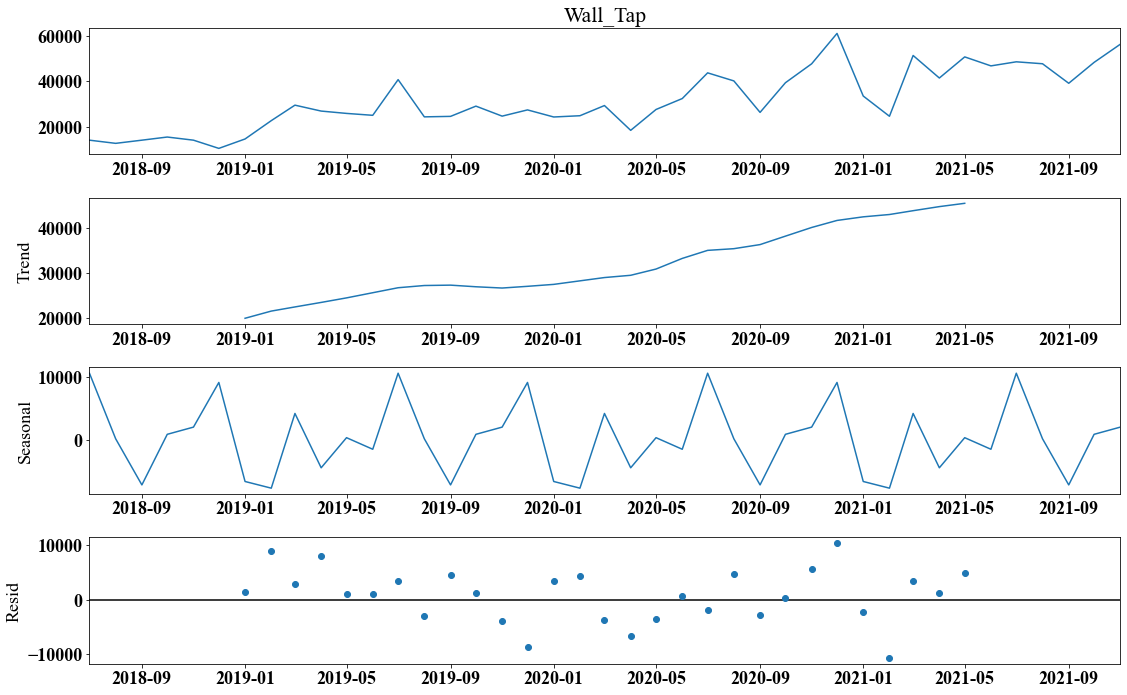

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df)
plt.rc("figure", figsize=(16,10)) 
decomposition.plot()
plt.show()

####  we can see upword trend and clear seasonal pattern

## checking Stationarity

### Augmented Dickey Fuller Test (ADF test)

In [20]:
from statsmodels.tsa.stattools import adfuller


In [21]:
def adf_test(dataframe):
    adf_result= adfuller(dataframe)
    useful_values = [v for v in adf_result[:4]]
    useful_values.extend([adf_result[4]['1%'], adf_result[4]['5%'], adf_result[4]['10%']])
    result=pd.DataFrame({'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used',
                                  'Critical value for 1%','Critical value for 5%','Critical value for 10%'],
                         'Value':useful_values})
    return result

In [22]:
adf_test(df)

,Label,Value
0,Test Statistic,-0.783219
1,p-value,0.824002
2,#Lags Used,4.000000
3,Number of Observations Used,36.000000
4,Critical value for 1%,-3.626652
5,Critical value for 5%,-2.945951
6,Critical value for 10%,-2.611671


In [23]:
adf_test(df).to_excel('ADF_Test_Original_df.xlsx')

#### Dataframe is not stationary as p-value	(0.824002) > 0.05     and Test statistics is large than even 10% of the critical value 

### Data transforming to make stationary

In [24]:
df_stat=df.diff().dropna() ##taking first difference
adf_test(df_stat)

,Label,Value
0,Test Statistic,-3.764433
1,p-value,0.003293
2,#Lags Used,10.000000
3,Number of Observations Used,29.000000
4,Critical value for 1%,-3.679060
5,Critical value for 5%,-2.967882
6,Critical value for 10%,-2.623158


In [25]:
adf_test(df_stat).to_excel('ADF_Test_Stat_df.xlsx')

#### Dataframe became stationary after first differencing as p-value	(0.0032932) < 0.05   and Test statistics is smaller than the critical values 

### <span style='background :pink' > we can set d=1 </span>

Text(0, 0.5, 'Production')

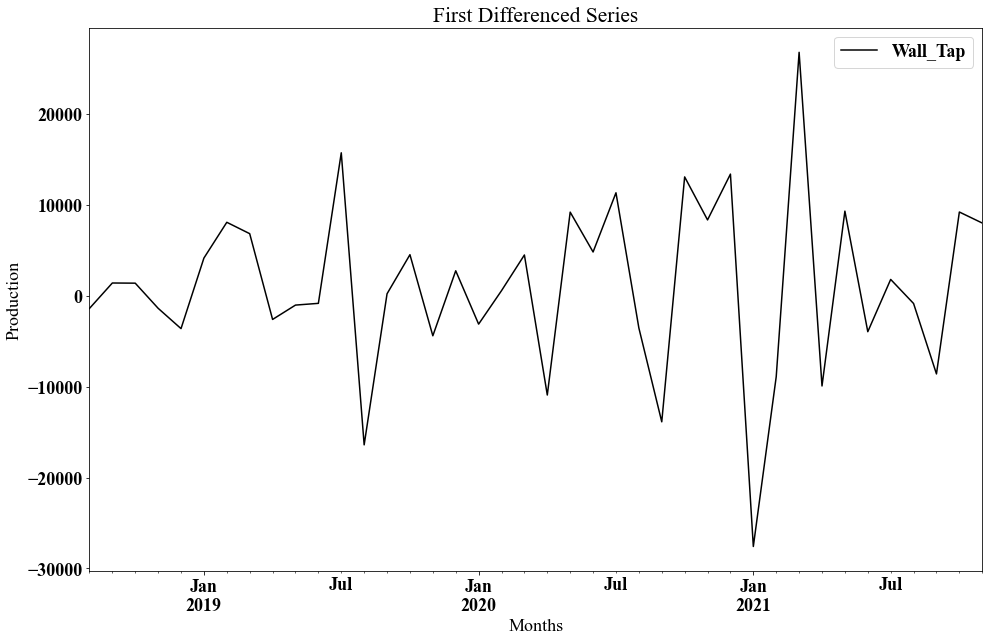

In [26]:
df_stat.plot(title="First Differenced Series", legend=True,color='black')
plt.ylabel('Production')

## ACF and PACF test on differenced data for p,q ( ref- https://otexts.com/fpp2/arima-r.html)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

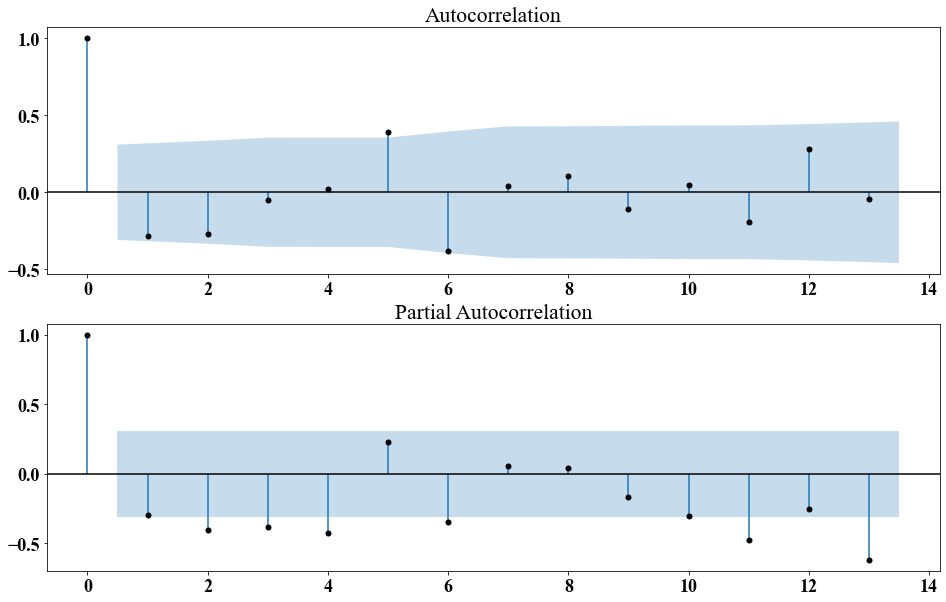

In [28]:
fig, ax = plt.subplots(2,1)
fig =plot_acf(df_stat, lags=13, ax=ax[0],color='black')
fig =plot_pacf(df_stat, lags=13, ax=ax[1],color='black')
plt.show()

###  from this we can consider p value upto 6 and q value as 1,2,5,6  
- it is not giving us clear indication on p,q and P,D,Q values so we will use grid search method

## Grid Search with SARIMAX model

In [29]:
pp= range(7)
qq= range(7)
dd= range(2)


In [30]:
from sklearn.metrics import r2_score
import warnings 
warnings.simplefilter('ignore')
scores = []
for p in pp:
    for d in dd:
        for q in qq:
            for P in range(3):
                for D in range(2):
                    for Q in range(3):
                        if p==0 and q==0:
                            continue
                        try:
                            mod = sm.tsa.statespace.SARIMAX(df_train, order=(p,d,q), seasonal_order=(P,D,Q,12))
                            res = mod.fit(disp=False)
                            score = [p,d,q,P,D,Q,res.aic,res.aicc,res.bic,res.llf]
                            '''print(score)'''
                            scores.append(score)
                            del mod
                            del res
                        except:
                            '''print('errored')'''
                        

res = pd.DataFrame(scores)
res.columns = ['p', 'd', 'q', 'P', 'D', 'Q','AIC','AICC','BIC','LLF']
res.sort_values(['AICC','AIC'])


,p,d,q,P,D,Q,AIC,AICC,BIC,LLF
973,4,0,2,1,0,2,2.000000e+01,2.846154e+01,3.610918e+01,0.000000e+00
1273,5,0,5,2,1,0,2.600000e+01,5.909091e+01,4.184539e+01,0.000000e+00
129,0,1,2,0,1,0,5.115246e+02,5.127246e+02,5.150588e+02,-2.527623e+02
130,0,1,2,0,1,1,5.114396e+02,5.135449e+02,5.161518e+02,-2.517198e+02
357,1,1,1,0,1,0,5.124964e+02,5.136964e+02,5.160306e+02,-2.532482e+02
...,...,...,...,...,...,...,...,...,...,...
568,2,0,6,1,1,2,2.637092e+14,2.637092e+14,2.637092e+14,-1.318546e+14
572,2,0,6,2,1,1,2.637142e+14,2.637142e+14,2.637142e+14,-1.318571e+14
201,0,1,6,0,1,0,NaN,NaN,NaN,NaN
202,0,1,6,0,1,1,NaN,NaN,NaN,NaN


In [31]:
res.sort_values(['AICC','AIC','LLF','BIC'],ascending=[True,True,False,True]).head(15)

,p,d,q,P,D,Q,AIC,AICC,BIC,LLF
973,4,0,2,1,0,2,20.000000,28.461538,36.109179,0.000000
1273,5,0,5,2,1,0,26.000000,59.090909,41.845386,0.000000
129,0,1,2,0,1,0,511.524607,512.724607,515.058769,-252.762304
130,0,1,2,0,1,1,511.439598,513.544861,516.151813,-251.719799
357,1,1,1,0,1,0,512.496411,513.696411,516.030572,-253.248205
135,0,1,2,1,1,0,511.836728,513.941991,516.548943,-251.918364
112,0,1,1,0,1,1,512.817141,514.017141,516.351303,-253.408571
117,0,1,1,1,1,0,513.152403,514.352403,516.686564,-253.576201
358,1,1,1,0,1,1,512.825305,514.930568,517.537520,-252.412652
375,1,1,2,0,1,0,513.406046,515.511309,518.118261,-252.703023


## Coeff estimatation

In [32]:
models=res.sort_values(['AICC','AIC','LLF','BIC'],ascending=[True,True,False,True]).head(15)

In [33]:
models.to_excel('Grid_Search_Res.xlsx')

In [34]:
len(models)

15

In [35]:
models=models.reset_index(drop=True)
Order_List=[]
for y in range(15):
    o=(int(models.iloc[y][0]),int(models.iloc[y][1]),int(models.iloc[y][2]))
    so=(int(models.iloc[y][3]),int(models.iloc[y][4]),int(models.iloc[y][5]),12)
    OL=[o,so]
    
    Order_List.append(OL)
Order_List

[[(4, 0, 2), (1, 0, 2, 12)],
 [(5, 0, 5), (2, 1, 0, 12)],
 [(0, 1, 2), (0, 1, 0, 12)],
 [(0, 1, 2), (0, 1, 1, 12)],
 [(1, 1, 1), (0, 1, 0, 12)],
 [(0, 1, 2), (1, 1, 0, 12)],
 [(0, 1, 1), (0, 1, 1, 12)],
 [(0, 1, 1), (1, 1, 0, 12)],
 [(1, 1, 1), (0, 1, 1, 12)],
 [(1, 1, 2), (0, 1, 0, 12)],
 [(0, 1, 1), (0, 1, 0, 12)],
 [(1, 1, 1), (1, 1, 0, 12)],
 [(2, 1, 0), (0, 1, 0, 12)],
 [(1, 1, 0), (0, 1, 0, 12)],
 [(2, 1, 1), (0, 1, 0, 12)]]

In [36]:
coeff_table=[]
for x in Order_List:
    mod = sm.tsa.statespace.SARIMAX(df_train, order=x[0], seasonal_order=x[1])
    ress = mod.fit(disp=False)
    try:
        arcoff=ress.arparams
    except:
        arcoff=0
    try:
        macoff=ress.maparams
    except:
        macoff=0
    try:
        sarcoff=ress.seasonalarparams
    except:
        sarcoff=0        
    try:
        smacoff=ress.seasonalmaparams
    except:
        smacoff=0
    c_t=[x[0],x[1],arcoff,macoff,sarcoff,smacoff]
    coeff_table.append(c_t)

In [37]:
CT=pd.DataFrame(coeff_table)
CT.columns = ['Order','Seasonal_Order','AR_Coeff','MA_Coeff','Seasonal_AR_Coeff','Seasonal_MA_Coeff']
CT.to_excel("Estimation_table.xlsx")

In [38]:
CT

,Order,Seasonal_Order,AR_Coeff,MA_Coeff,Seasonal_AR_Coeff,Seasonal_MA_Coeff
0,"(4, 0, 2)","(1, 0, 2, 12)","[1.9999574019023931, -1.2692171580397371e-06, ...","[1.9996691157892692, 0.9996698418659954]",[-0.9999999370507789],"[1.9999995476405095, 0.9999998427991613]"
1,"(5, 0, 5)","(2, 1, 0, 12)","[-2.9153056946222415, -1.9145384461104356, 1.9...","[2.772893474712255, 1.8269179347539968, -1.645...","[-9.847007283436682e-05, 0.9999014606603236]",0
2,"(0, 1, 2)","(0, 1, 0, 12)",0,"[-0.3965048735795086, -0.603371477785239]",0,0
3,"(0, 1, 2)","(0, 1, 1, 12)",0,"[-0.5063640768308695, -0.4929270013458283]",0,[-0.5395957911563208]
4,"(1, 1, 1)","(0, 1, 0, 12)",[0.5045269536996975],[-0.9999751538171369],0,0
5,"(0, 1, 2)","(1, 1, 0, 12)",0,"[-0.49986416417970525, -0.4996957133724418]",[-0.39414724630189885],0
6,"(0, 1, 1)","(0, 1, 1, 12)",0,[-0.9982916167043816],0,[-0.9841208748703336]
7,"(0, 1, 1)","(1, 1, 0, 12)",0,[-0.9048275872156388],[-0.6226689930807388],0
8,"(1, 1, 1)","(0, 1, 1, 12)",[0.3121866478732781],[-0.9988431977412288],0,[-0.5921291828818827]
9,"(1, 1, 2)","(0, 1, 0, 12)",[0.1605918074350095],"[-0.5307954448380443, -0.4685011947296017]",0,0


## Now we will use model quality Metrics to choose the better fitted models

In [39]:
#MAPE user define function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

In [41]:
def plot_sarima (dataframe, order, seasonal_order,steps):
    mod = sm.tsa.statespace.SARIMAX(dataframe, order=order, seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    predict=res.forecast(steps)
    
    #Quality Measures
    MSE= mean_squared_error(df_test,predict)
    RMSE=format(sqrt(MSE),'.2f')
    MAE= format(mean_absolute_error(df_test,predict),'.2f')
    MAPE=format(mean_absolute_percentage_error(df_test,predict),'.2f')
    R2= format(r2_score(df_test,predict),'.2f')
    qm=[order,seasonal_order,RMSE,MAE,MAPE,R2]
    
    # Plot
    fig, ax = plt.subplots(figsize=(18,6))
    ax.xaxis.grid(2)
    ax.plot(dataframe,'black', label="train")
    ax.plot(df_test , 'red', label= 'test'),
    ax.plot( predict, 'b--', linestyle='--',linewidth=2, label='forcast')

    ax.set(title= 'Order: {0}{1}; RMSE={2}; MAE={3}; MAPE={4}; R2={5} '.format(order,seasonal_order, RMSE,MAE,MAPE,R2));
    ax.legend(loc="upper left")
    return qm
    
#plot_sarima(df_train,order=(0,1,2),seasonal_order=(0,1,1,12),steps=4)

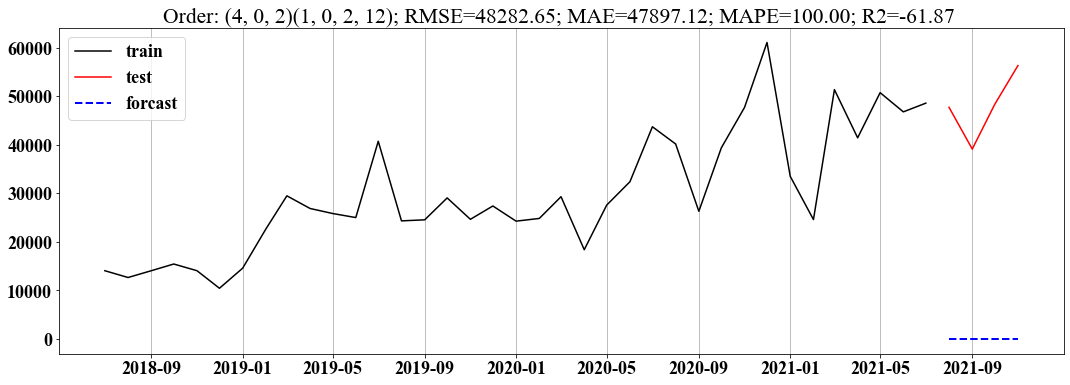

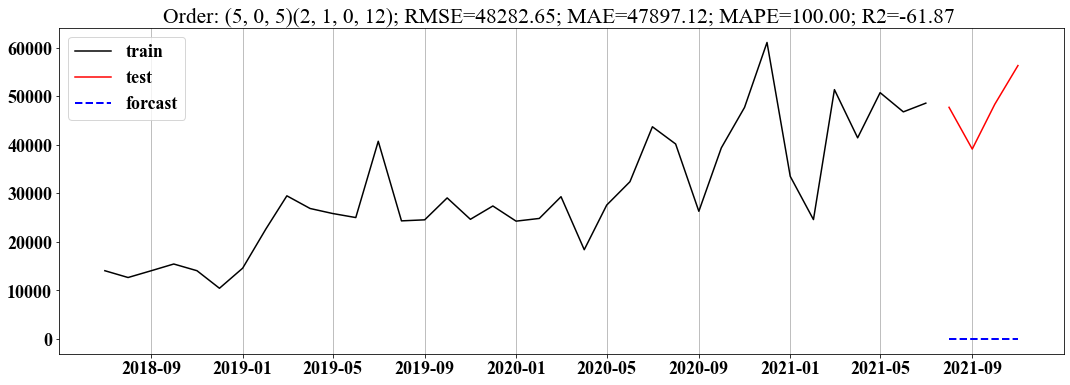

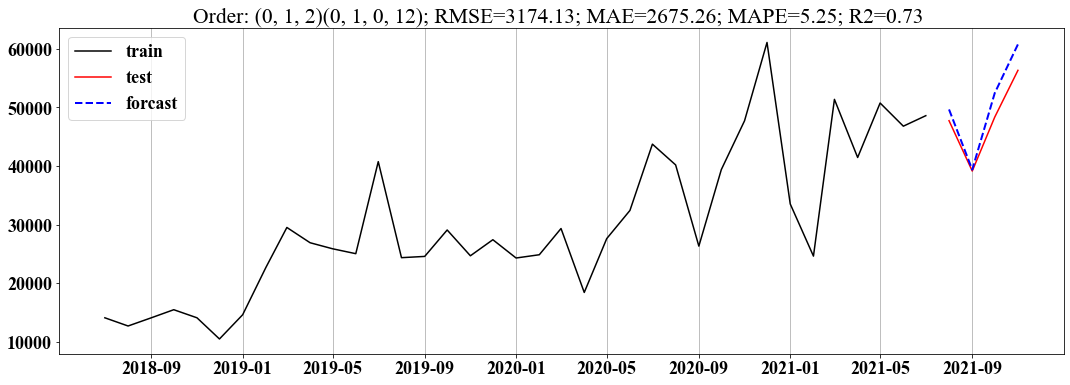

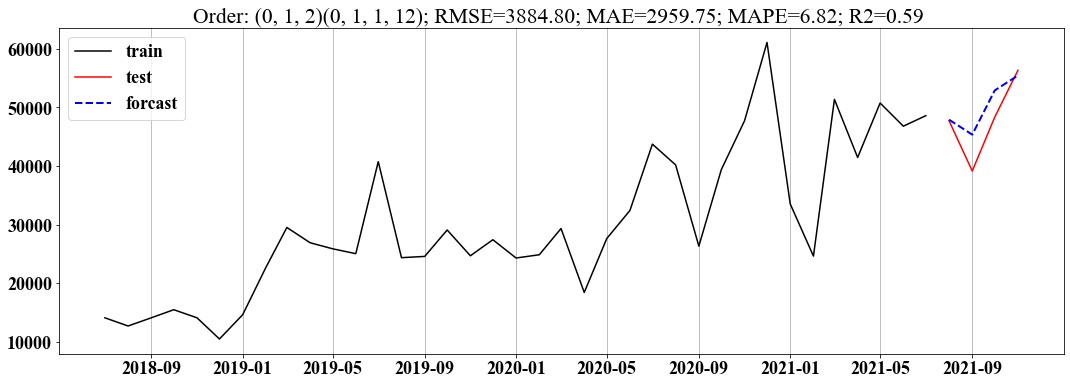

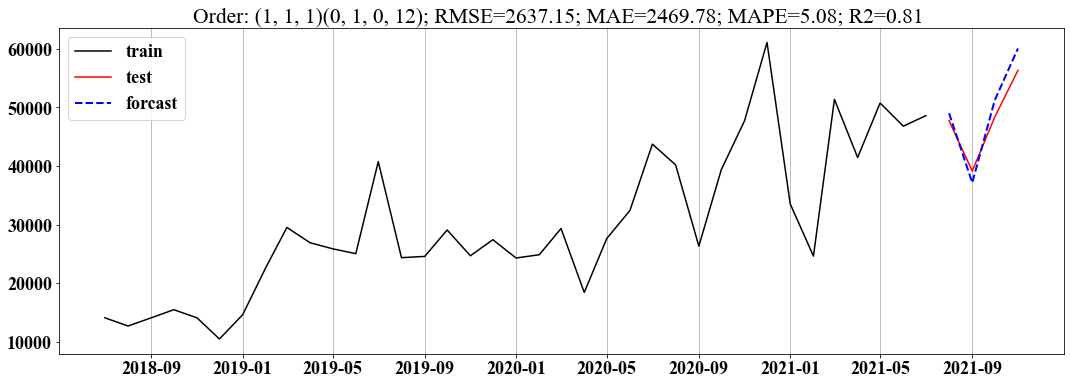

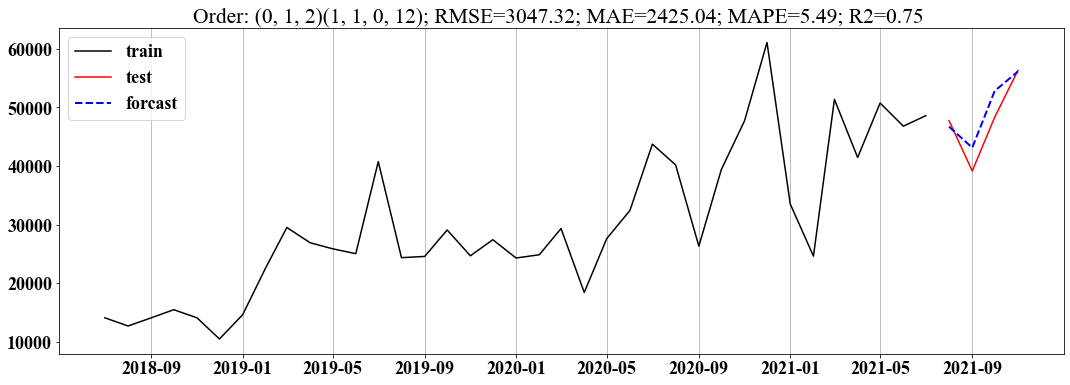

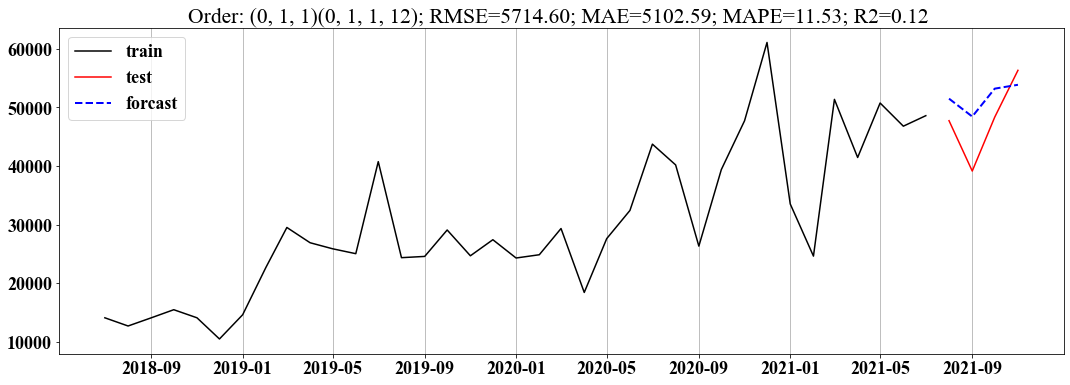

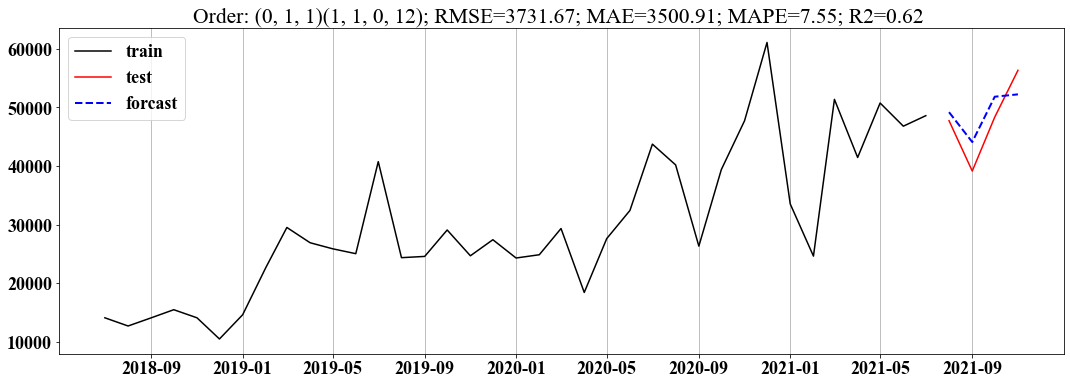

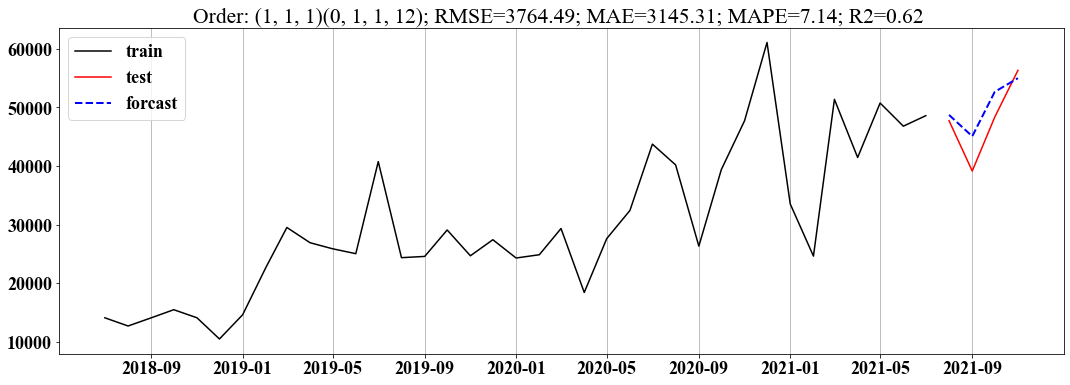

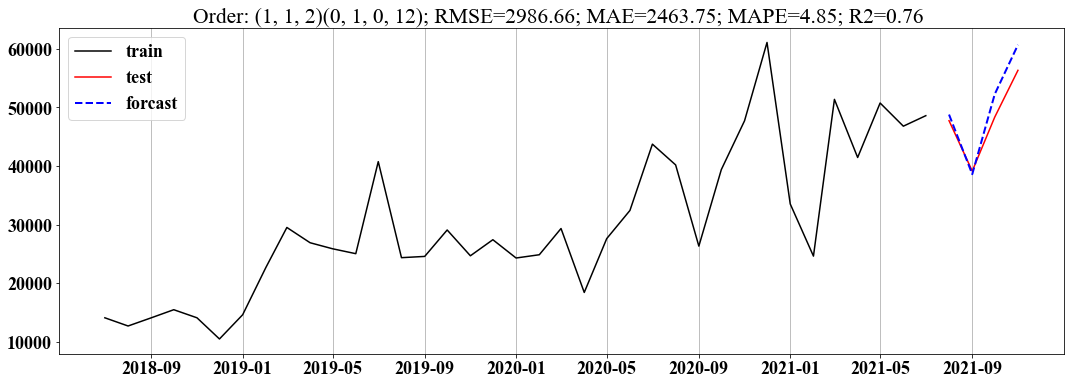

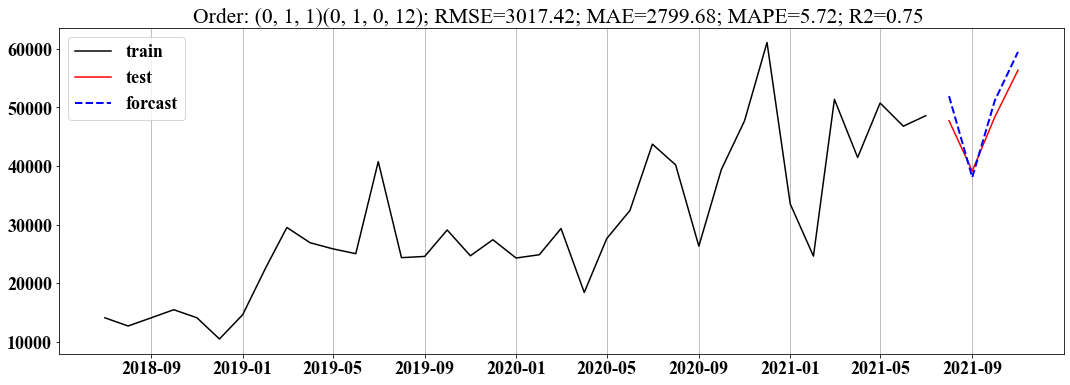

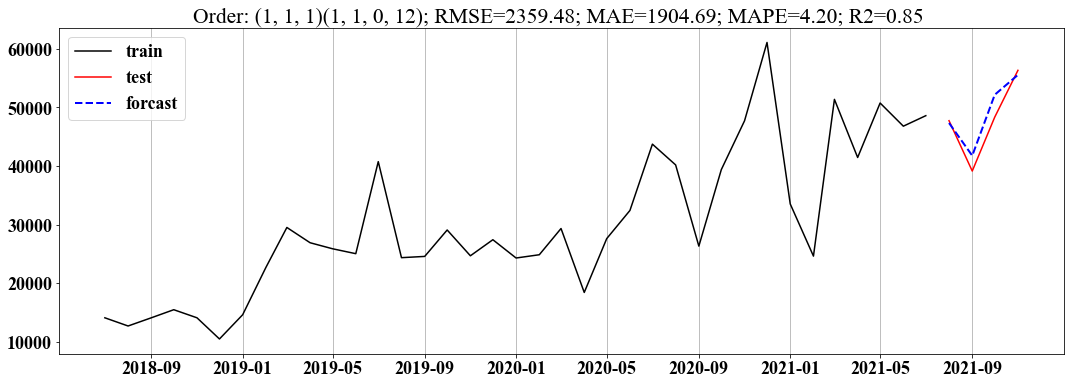

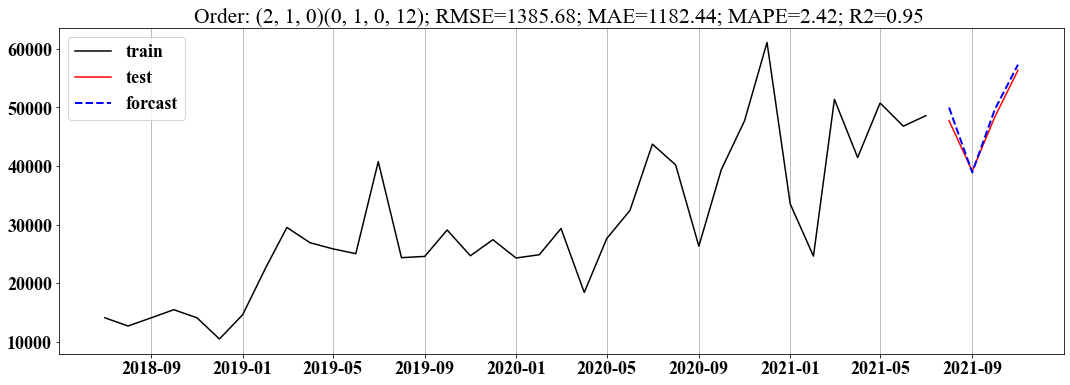

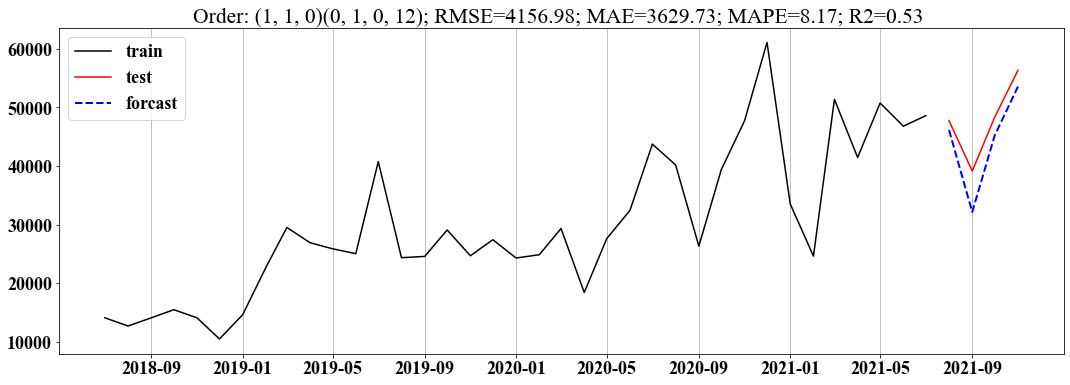

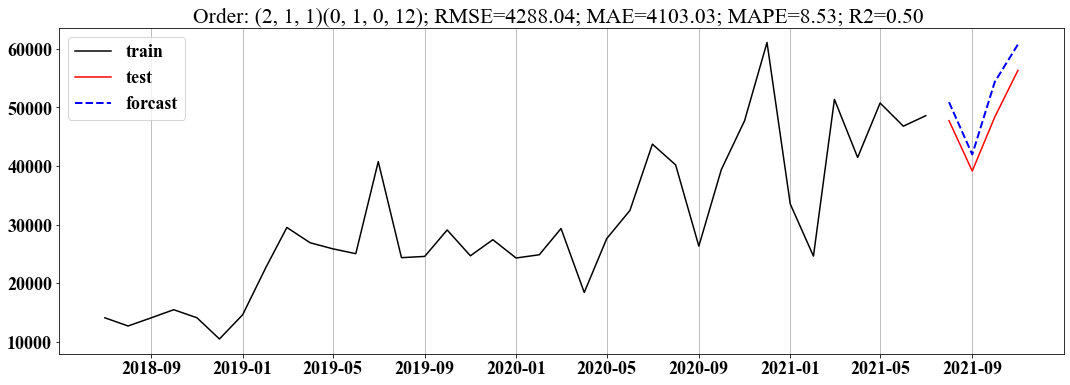

In [42]:
QM=[]
for x in Order_List:
    ##print(x[0])
    qm=plot_sarima (dataframe=df_train, order=x[0], seasonal_order=x[1],steps=4)
    QM.append(qm)
Quality_Metrics=pd.DataFrame(QM)

In [43]:
Quality_Metrics.columns = ['Order','Seasonal_Order','RMSE','MAE','MAPE','R2']
Quality_Metrics.sort_values(['R2','RMSE','MAPE', 'MAE'],ascending=[False,True,True,True],inplace=True)
Quality_Metrics

,Order,Seasonal_Order,RMSE,MAE,MAPE,R2
12,"(2, 1, 0)","(0, 1, 0, 12)",1385.68,1182.44,2.42,0.95
11,"(1, 1, 1)","(1, 1, 0, 12)",2359.48,1904.69,4.20,0.85
4,"(1, 1, 1)","(0, 1, 0, 12)",2637.15,2469.78,5.08,0.81
9,"(1, 1, 2)","(0, 1, 0, 12)",2986.66,2463.75,4.85,0.76
10,"(0, 1, 1)","(0, 1, 0, 12)",3017.42,2799.68,5.72,0.75
5,"(0, 1, 2)","(1, 1, 0, 12)",3047.32,2425.04,5.49,0.75
2,"(0, 1, 2)","(0, 1, 0, 12)",3174.13,2675.26,5.25,0.73
7,"(0, 1, 1)","(1, 1, 0, 12)",3731.67,3500.91,7.55,0.62
8,"(1, 1, 1)","(0, 1, 1, 12)",3764.49,3145.31,7.14,0.62
3,"(0, 1, 2)","(0, 1, 1, 12)",3884.80,2959.75,6.82,0.59


In [44]:
Quality_Metrics.to_excel('QM_Result.xlsx')

# Residual Diagnostic (dataframe = df)

In [45]:
def Res_Diag(order, seasonal_order):
    mod = sm.tsa.statespace.SARIMAX(df, order=order, seasonal_order=seasonal_order)
    res = mod.fit(disp=False)
    df_resid=res.resid
    df_resid.plot()

    #ACF & PACF plot
    fig, ax = plt.subplots(2,1)
    fig =plot_acf(df_resid, lags=13, ax=ax[0])
    fig =plot_pacf(df_resid, lags=13, ax=ax[1])
    plt.show()

    #Histogram
    ax = pd.DataFrame(df_resid).plot(kind='hist')
    ax.set_ylabel('Number of occurences')
    ax.set_xlabel('Residual')
    plt.show()
    
    res.plot_diagnostics(figsize=(15, 12))
    plt.show()


    #Summary
    print(res.summary())


###### We are going to diagnos the top 5 models conating highest R2 and lowest RMSE, MAPE, MAE values

In [46]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Model 1 (2,1,0)(0,1,0,12)

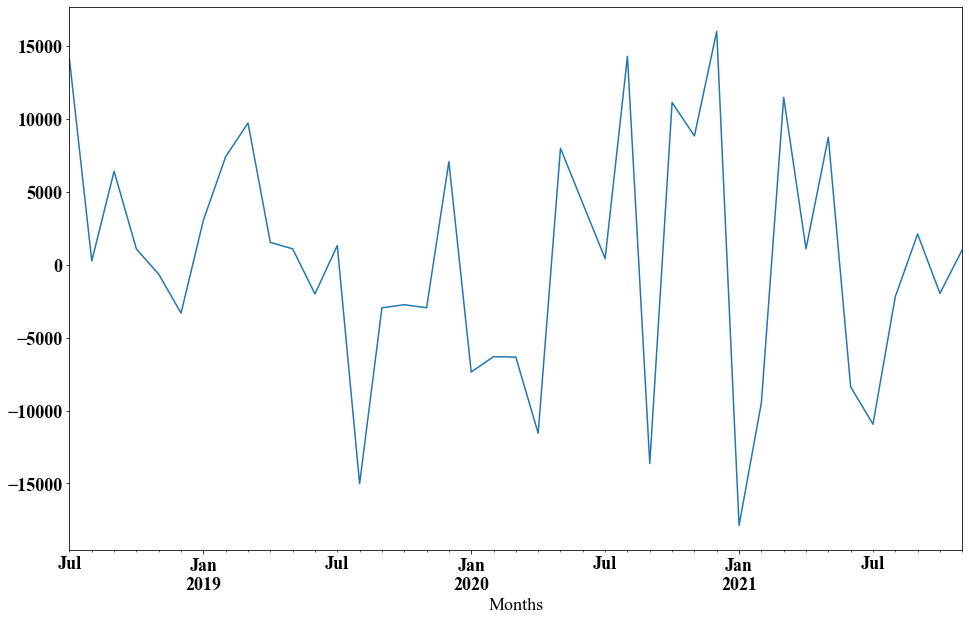

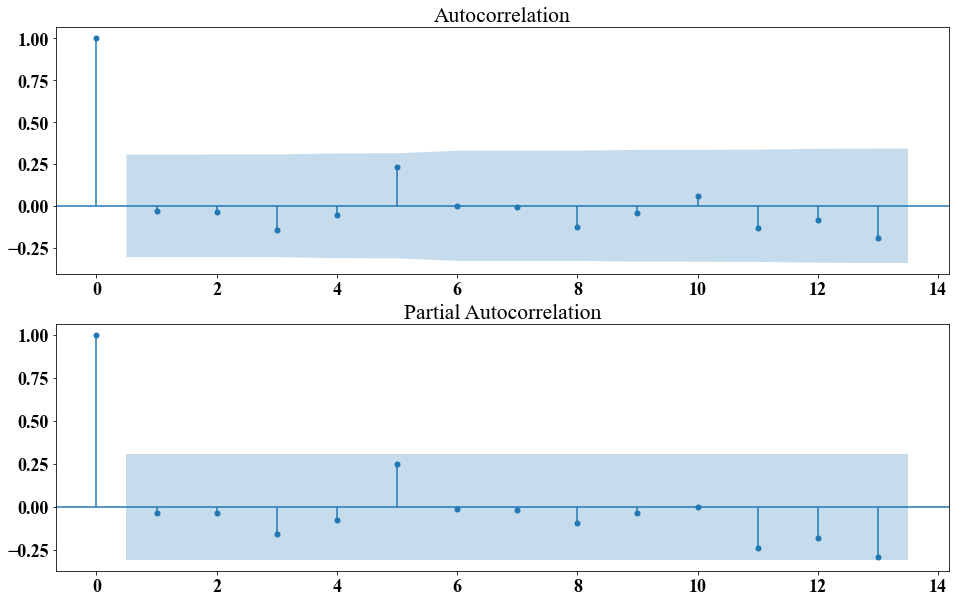

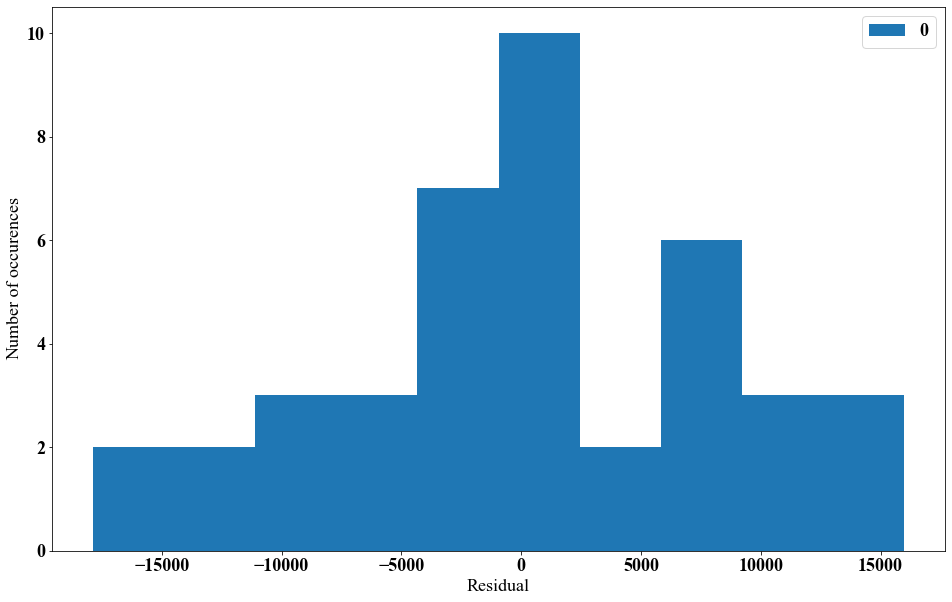

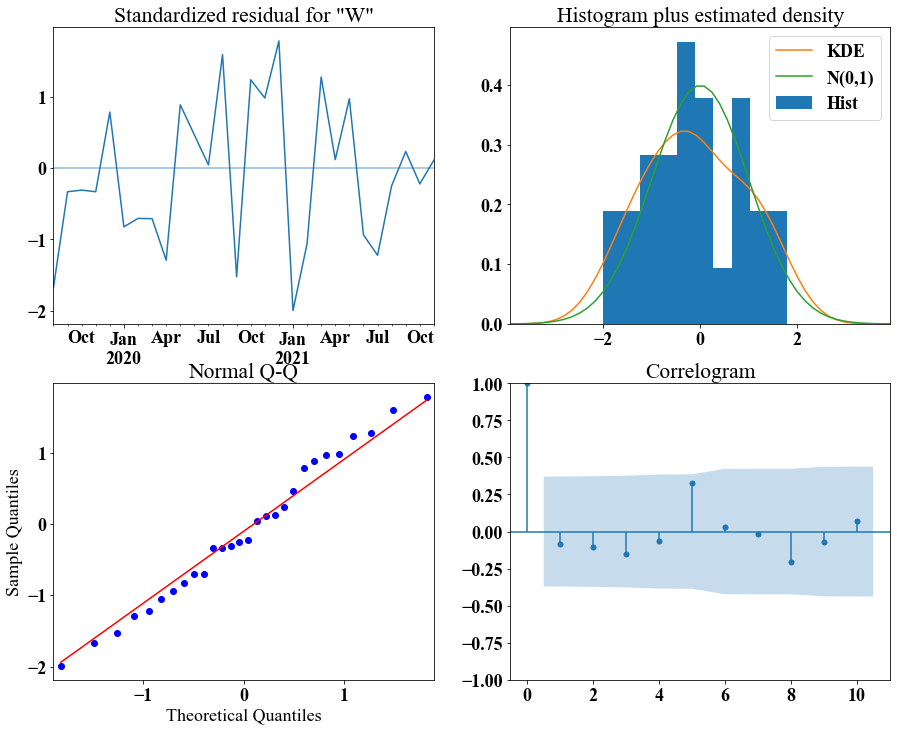

                                     SARIMAX Results                                      
Dep. Variable:                           Wall_Tap   No. Observations:                   41
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -294.979
Date:                            Wed, 02 Feb 2022   AIC                            595.958
Time:                                    20:26:12   BIC                            599.955
Sample:                                07-01-2018   HQIC                           597.180
                                     - 11-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1650      0.167     -0.990      0.322      -0.492       0.162
ar.L2         -0.3791      0.159   

In [47]:
order_1=(2,1,0)
seasonal_order_1=(0,1,0,12)
Res_Diag(order=order_1, seasonal_order=seasonal_order_1)

##### Data seems like white noise because acf and pacf plot shows no significant lags and histogram shows residuals follows a nearly normal distribuition. (Korstanje, 2021)

### Model 2 (1,1,1)(1,1,0,12)

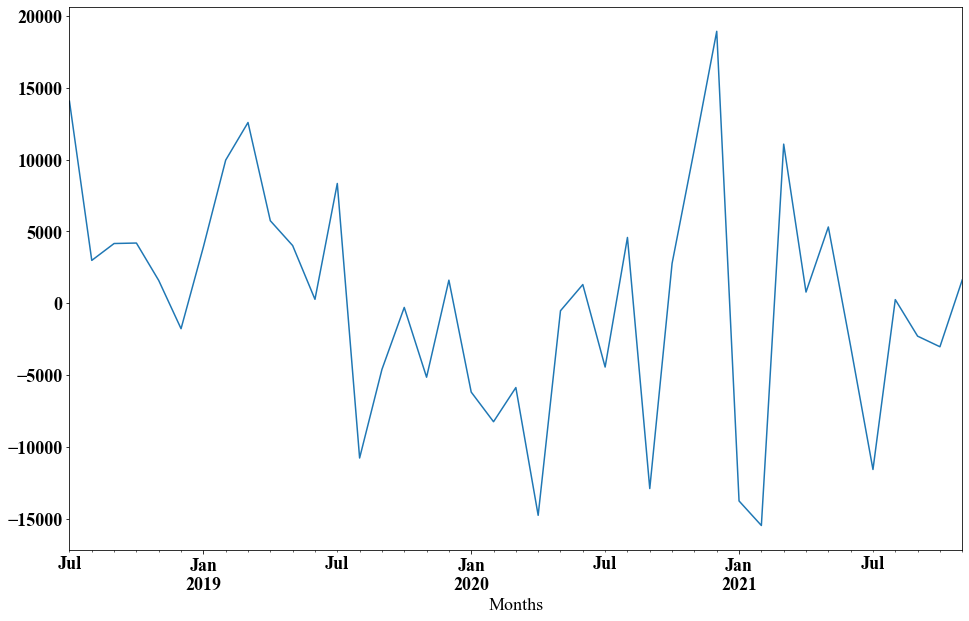

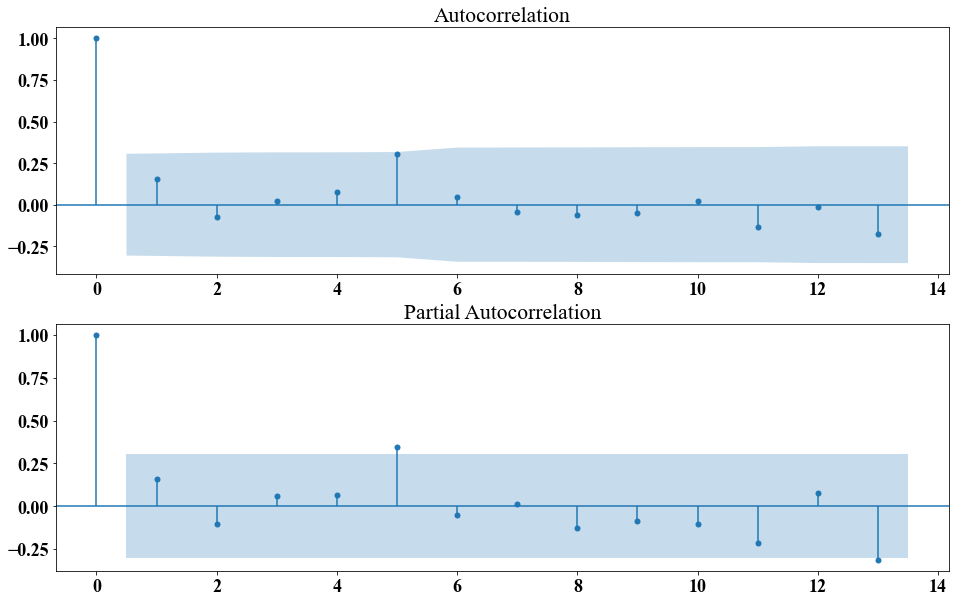

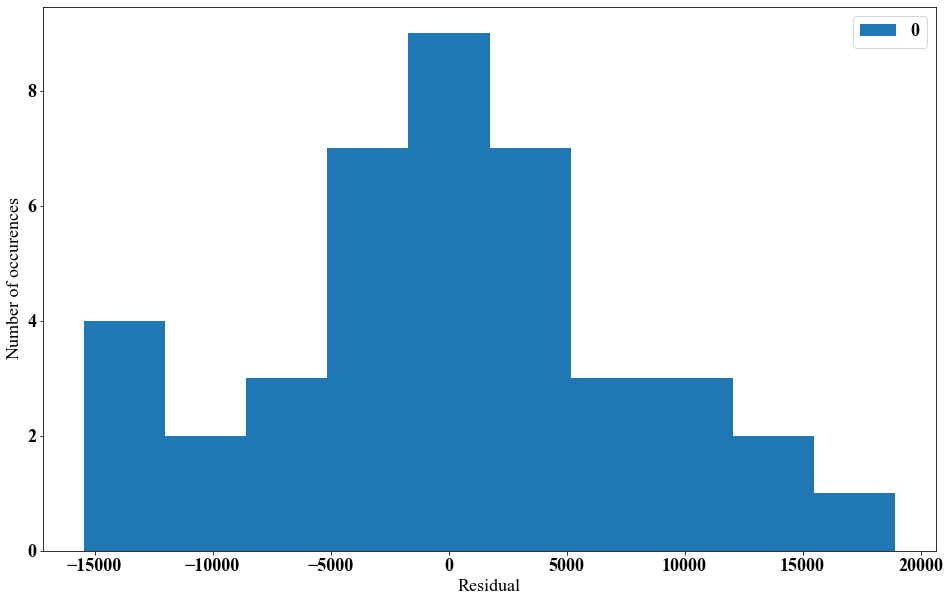

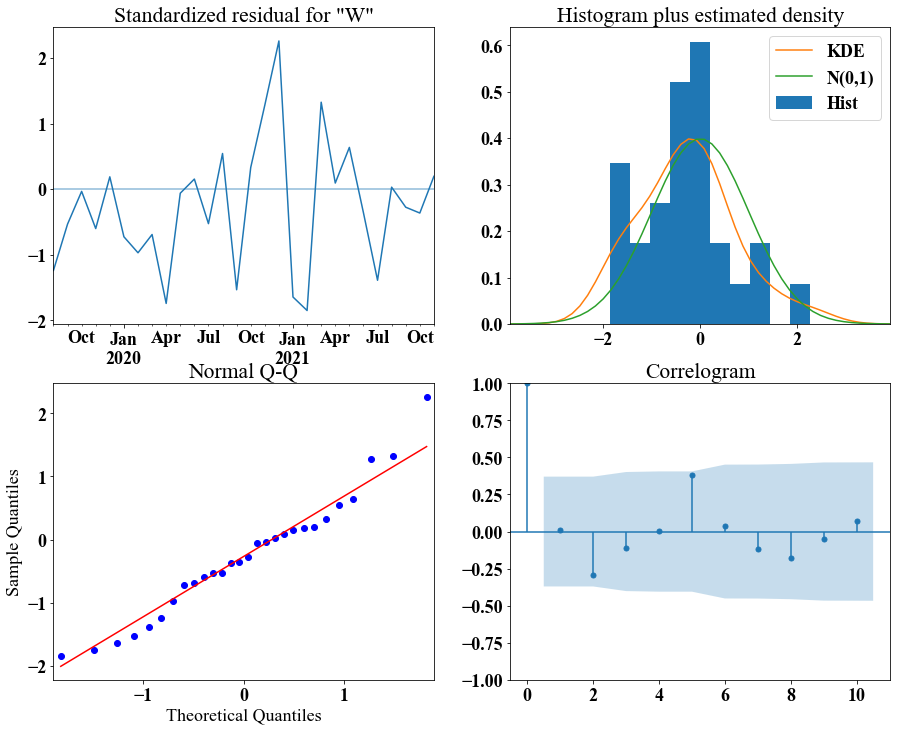

                                      SARIMAX Results                                      
Dep. Variable:                            Wall_Tap   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -292.643
Date:                             Wed, 02 Feb 2022   AIC                            593.286
Time:                                     20:26:13   BIC                            598.614
Sample:                                 07-01-2018   HQIC                           594.915
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3651      0.153      2.383      0.017       0.065       0.665
ma.L1         -0.9984      

In [48]:
order_2=(1,1,1)
seasonal_order_2=(1,1,0,12)
Res_Diag(order=order_2, seasonal_order=seasonal_order_2)

##### Data doesn't seem like white noise because acf and pacf plot shows significant lags and histogram shows residuals Doesn’t follows a normal distribuition. (Korstanje, 2021)

## Model 3 (1,1,1)(0,1,0,12)

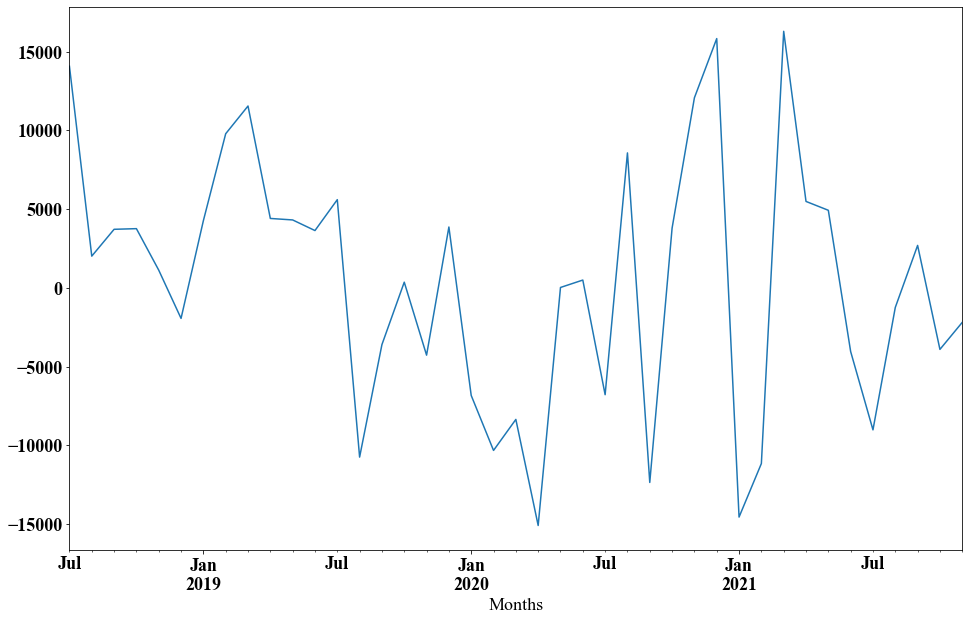

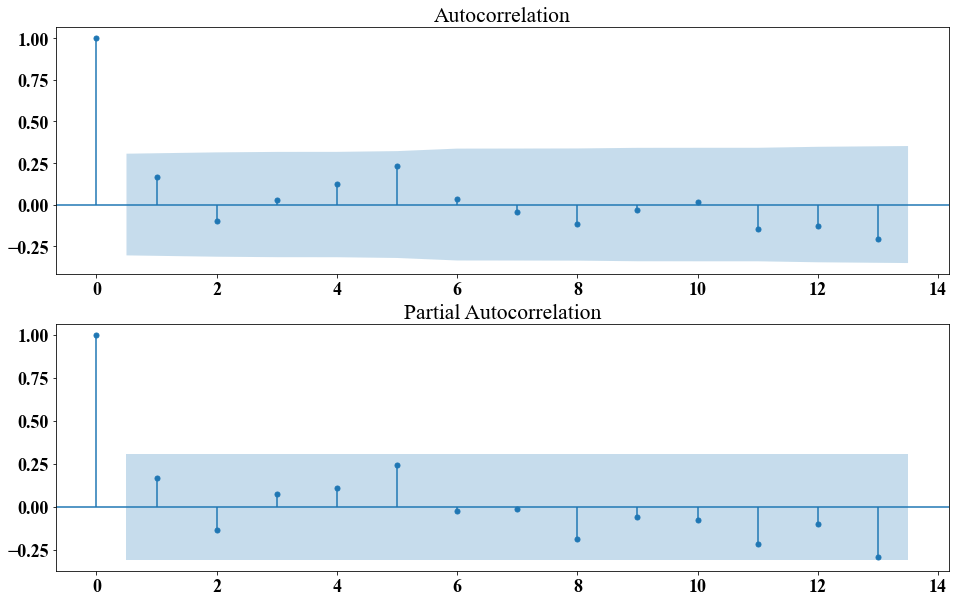

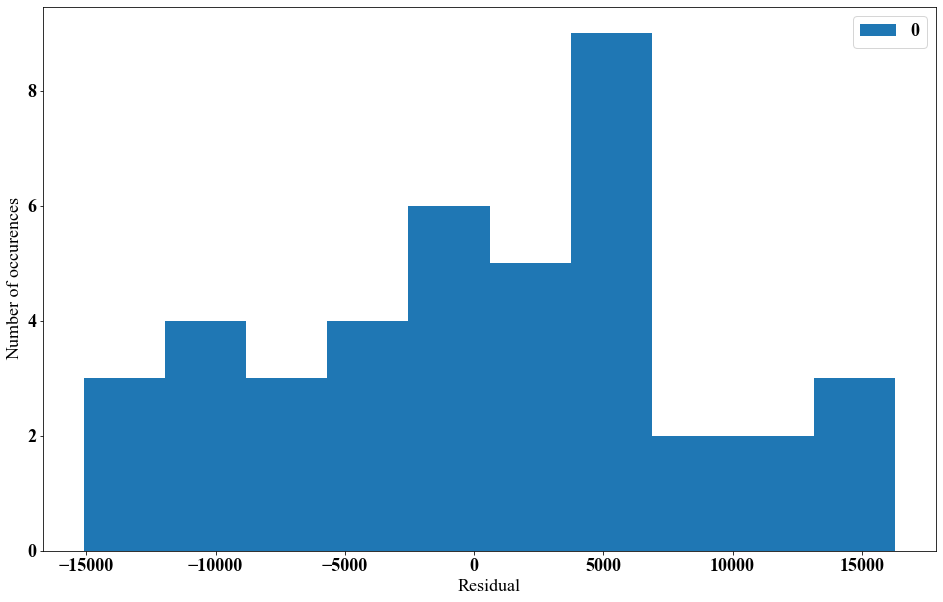

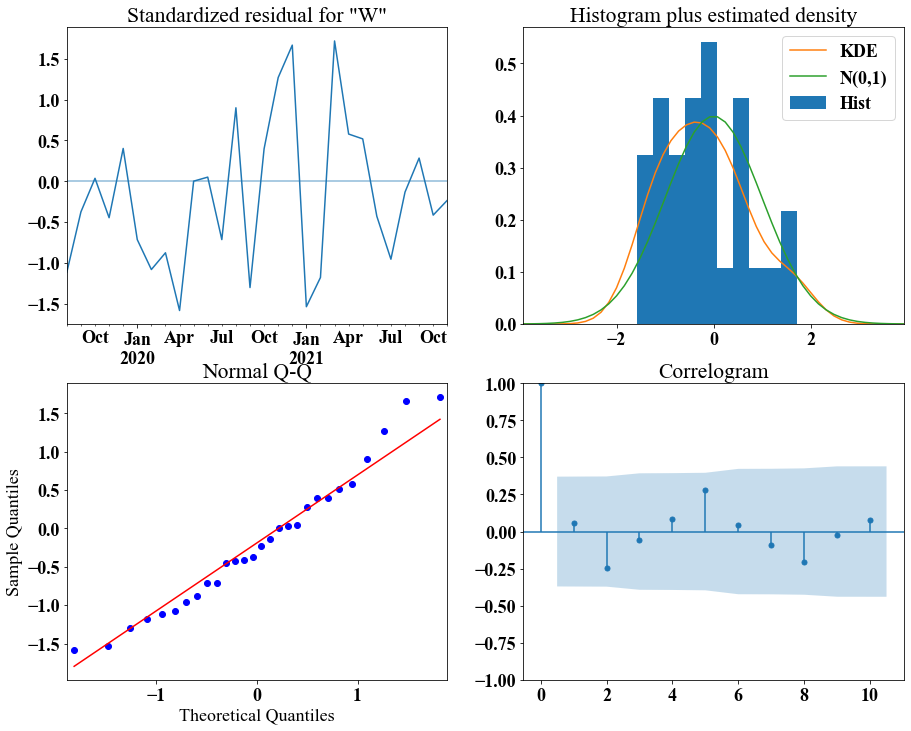

                                      SARIMAX Results                                      
Dep. Variable:                            Wall_Tap   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -293.739
Date:                             Wed, 02 Feb 2022   AIC                            593.477
Time:                                     20:26:13   BIC                            597.474
Sample:                                 07-01-2018   HQIC                           594.699
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5064      0.185      2.741      0.006       0.144       0.869
ma.L1         -0.9879      

In [49]:
order_3=Quality_Metrics.iloc[2][0]
seasonal_order_3=Quality_Metrics.iloc[2][1]

Res_Diag(order=order_3, seasonal_order=seasonal_order_3)

### Model 4 (1,1,2)(0,1,0,12)

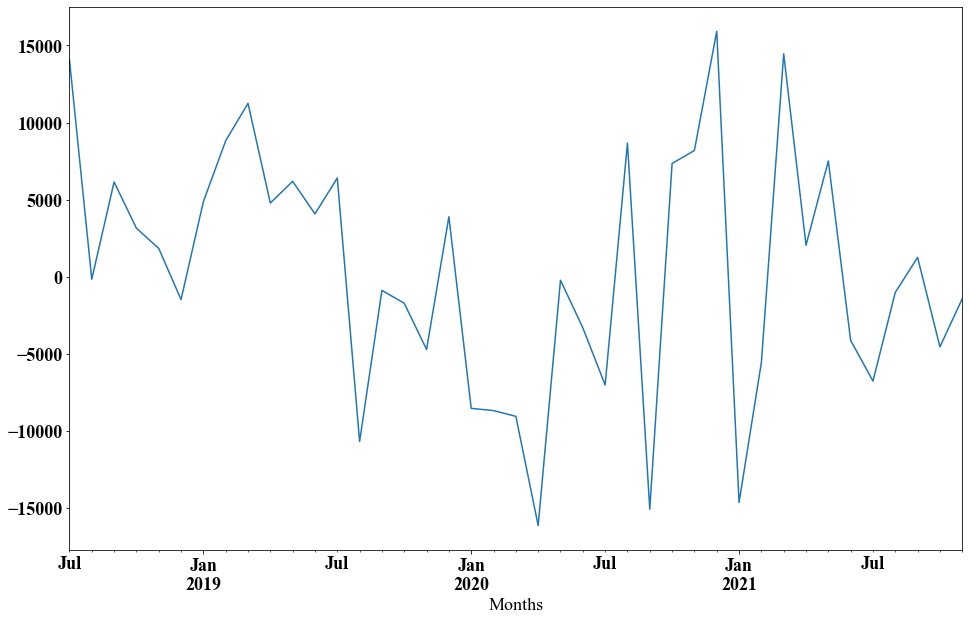

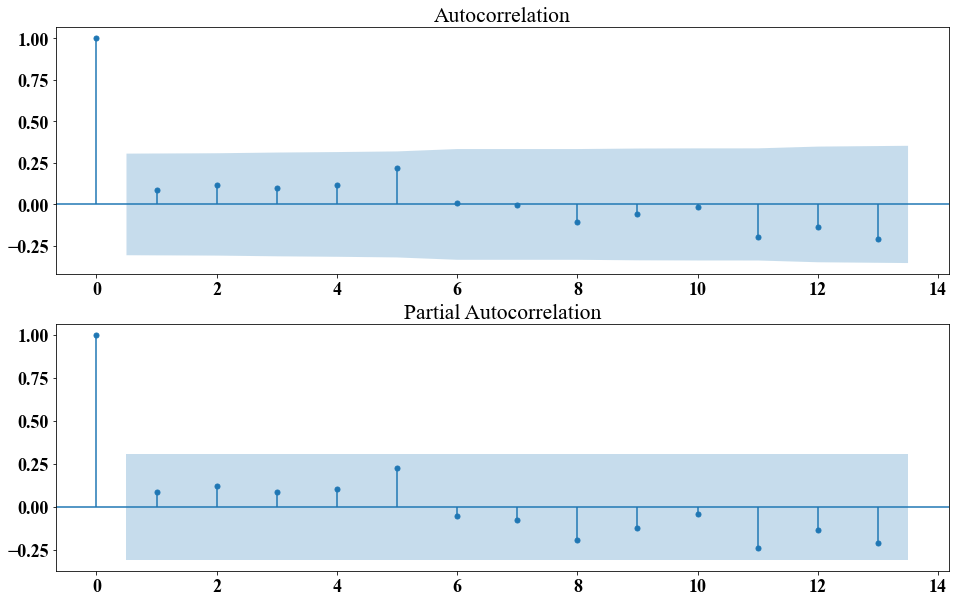

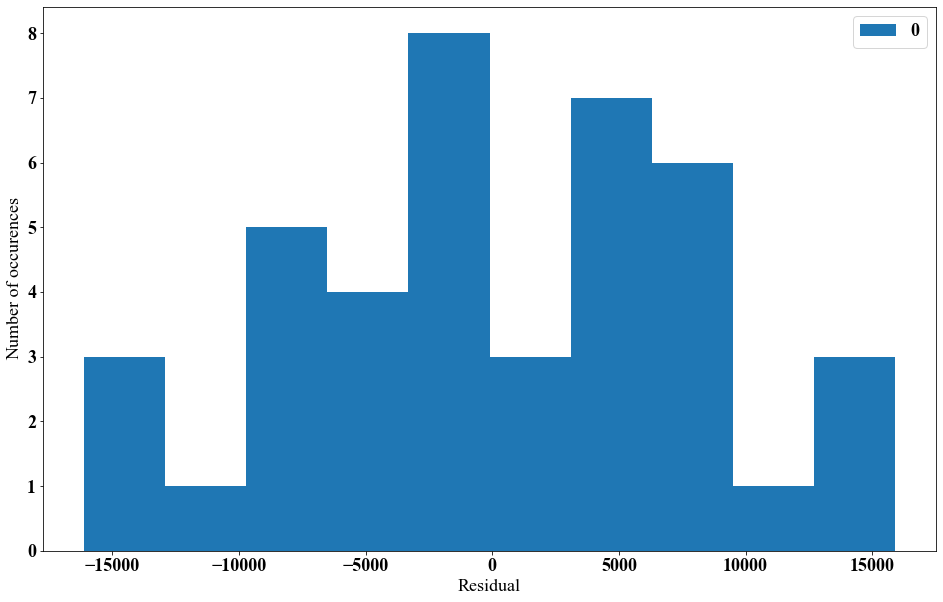

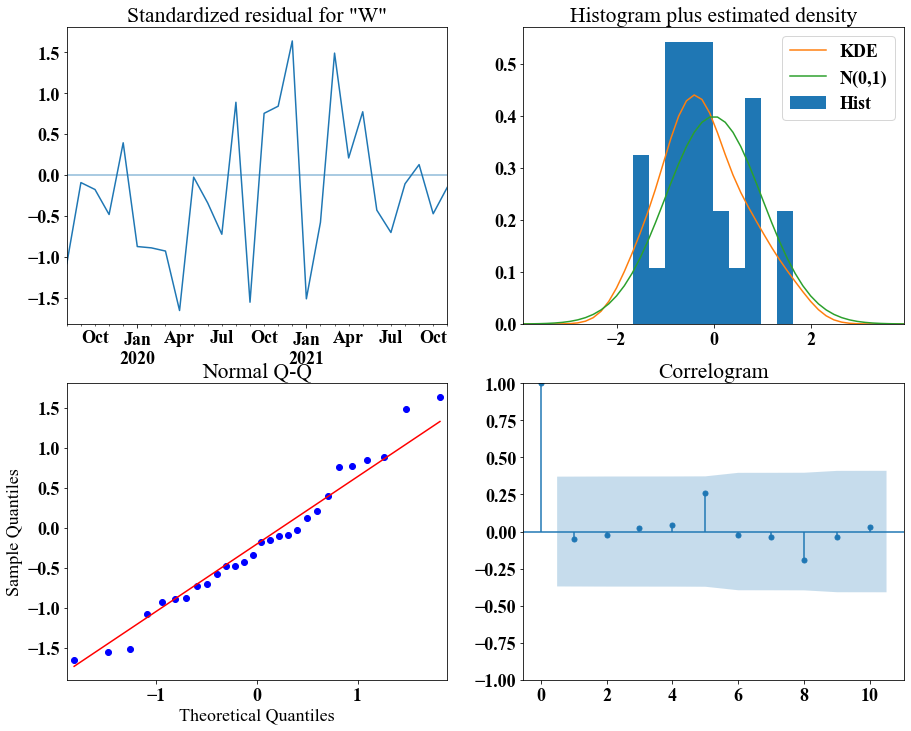

                                      SARIMAX Results                                      
Dep. Variable:                            Wall_Tap   No. Observations:                   41
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -293.359
Date:                             Wed, 02 Feb 2022   AIC                            594.719
Time:                                     20:26:14   BIC                            600.048
Sample:                                 07-01-2018   HQIC                           596.348
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.356      0.454      0.650      -0.536       0.859
ma.L1         -0.5107      

In [50]:
order_4=Quality_Metrics.iloc[3][0]
seasonal_order_4=Quality_Metrics.iloc[3][1]

Res_Diag(order=order_4, seasonal_order=seasonal_order_4)

## Model 5 (0,1,1)(0,1,0,12)

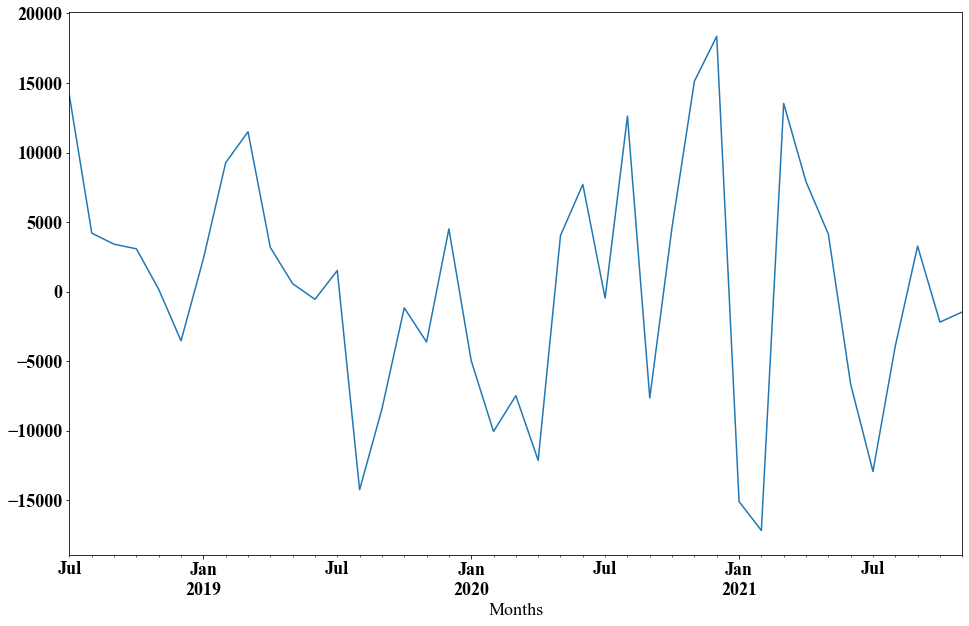

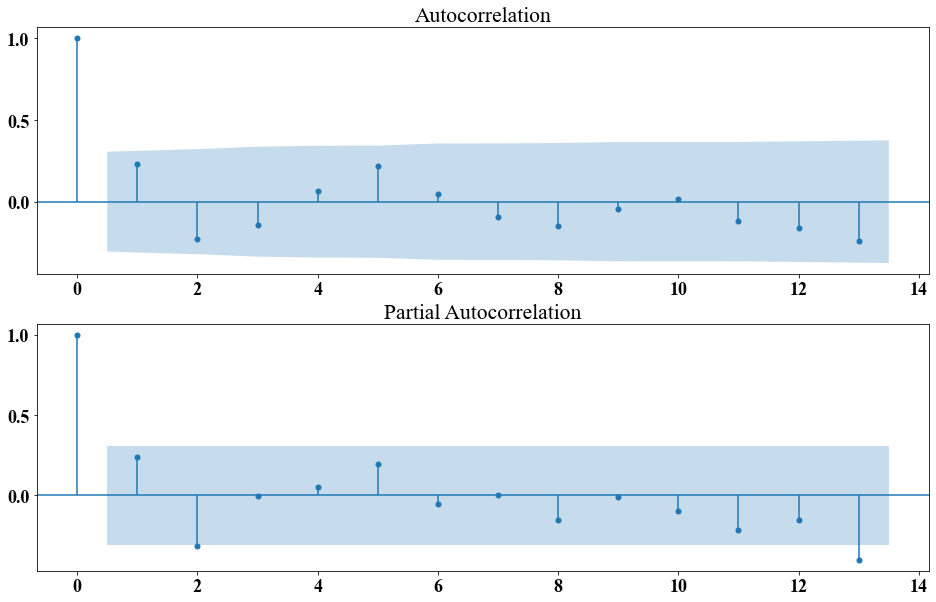

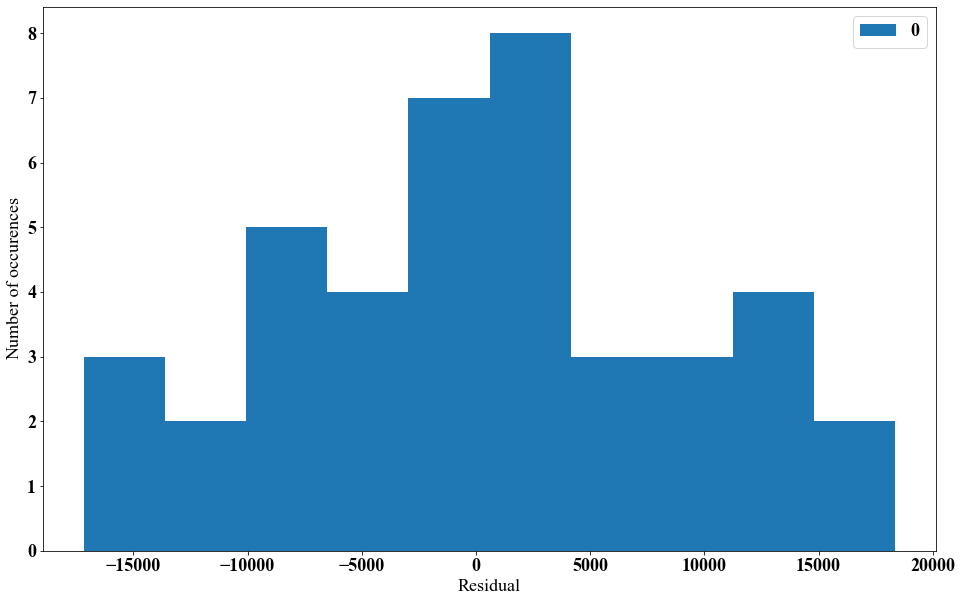

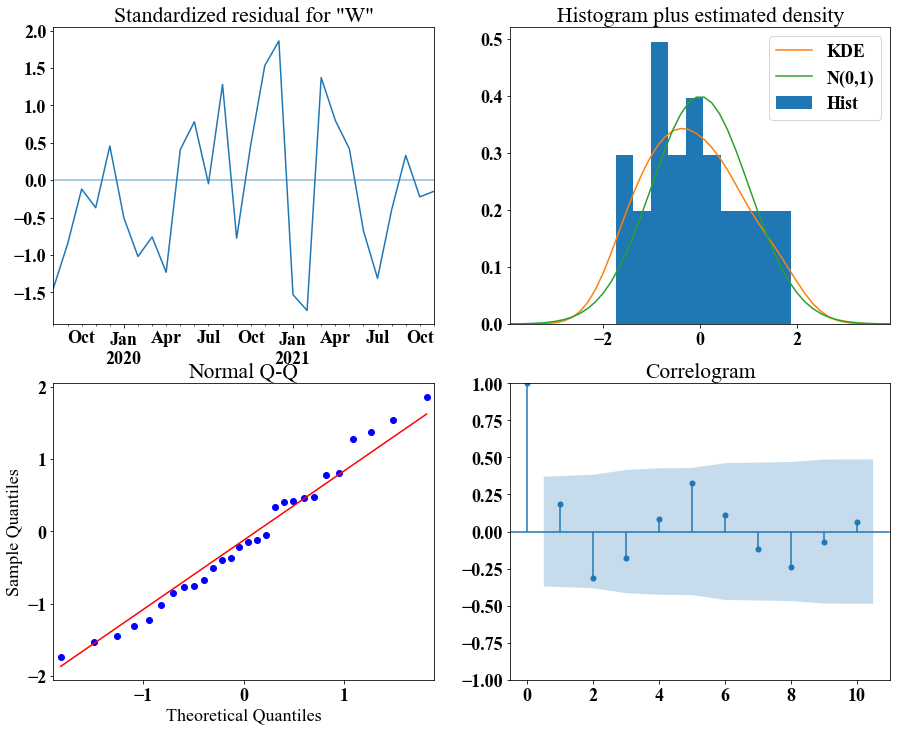

                                      SARIMAX Results                                      
Dep. Variable:                            Wall_Tap   No. Observations:                   41
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -296.330
Date:                             Wed, 02 Feb 2022   AIC                            596.661
Time:                                     20:26:15   BIC                            599.325
Sample:                                 07-01-2018   HQIC                           597.475
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5106      0.150     -3.403      0.001      -0.805      -0.216
sigma2      9.707e+07   4.2

In [51]:
order_5=Quality_Metrics.iloc[4][0]
seasonal_order_5=Quality_Metrics.iloc[4][1]

Res_Diag(order=order_5, seasonal_order=seasonal_order_5)

### Model 3 (1,1,1)(0,1,0,12) seems more suitable choice  

# Forecasting

In [52]:
order_3=(1,1,1)
seasonal_order_3=(0,1,0,12)
steps=6
mod_3 = sm.tsa.statespace.SARIMAX(df, order=order_3, seasonal_order=seasonal_order_3)
res_3 = mod_3.fit(disp=False)
predict_3 = res_3.get_prediction(end=mod_3.nobs-1+steps)

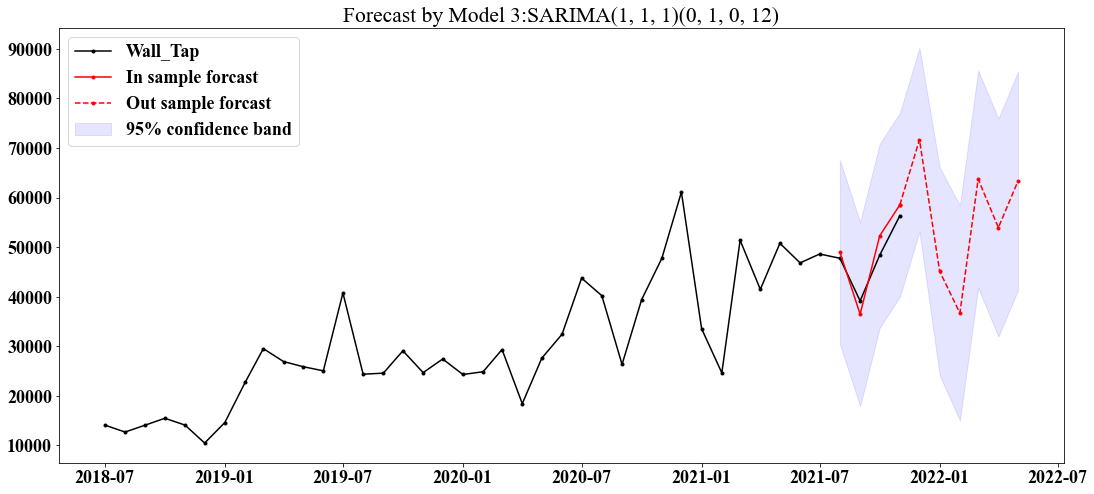

In [53]:
#90% confidence band
predict_ci_3 = predict_3.conf_int(alpha=.05)[-(steps+4):] 

# Graph
fig, ax = plt.subplots(figsize=(18,8))
#ax.xaxis.grid('both')
ax.plot( df,'black',label=prod_name,marker='o',markersize=3)

# Plot
ax.plot( predict_3.predicted_mean[-(steps+4):-steps], 'red', label= 'In sample forcast',marker='o',markersize=3),
ax.plot( predict_3.predicted_mean[-(steps+1):], 'r--', label='Out sample forcast',marker='o',markersize=3)
ax.fill_between(predict_ci_3.index, predict_ci_3.iloc[:, 0], predict_ci_3.iloc[:, 1], color='blue', alpha=.1,label='95% confidence band')
ax.set(title='Forecast by Model 3:SARIMA{0}{1}'.format(order_3,seasonal_order_3))
ax.legend(loc="upper left")


In [54]:
Forecast_table=predict_ci_3.join(df_test,how='outer')
Forecast_table=Forecast_table.join(predict_3.predicted_mean[-10:],how='outer')
Forecast_table.rename(columns={"Wall_Tap": "Actual",
                               'predicted_mean':'Forecast',
                               "lower Wall_Tap": "Lower Limit",
                               'upper Wall_Tap':'Upper limit',},
                      inplace=True)

In [55]:
Forecast_table = Forecast_table[['Actual', 'Forecast', 'Lower Limit', 'Upper limit']]
Forecast_table

,Actual,Forecast,Lower Limit,Upper limit
2021-08-01,47746.202667,48993.233848,30419.529446,67566.938250
2021-09-01,39141.667565,36449.399631,17881.407312,55017.391949
2021-10-01,48351.484333,52262.762149,33700.176204,70825.348095
2021-11-01,56349.109000,58544.438394,39986.975523,77101.901265
2021-12-01,NaN,71695.340467,53142.737657,90247.943276
2022-01-01,NaN,45101.103829,24092.378167,66109.829491
2022-02-01,NaN,36691.977496,14992.549358,58391.405634
2022-03-01,NaN,63727.908806,41800.193946,85655.623666
2022-04-01,NaN,53927.705142,31912.554097,75942.856187
2022-05-01,NaN,63299.607444,41245.582755,85353.632133


In [56]:
Forecast_table.to_excel('Forecast_table.xlsx')